# Прогнозирование и обнаружение неисправностей на станках лазерной резки Навигатор КС-12В

## Препроцессинг и первичный анализ

### Тестовая выборка

In [171]:
import json
from datetime import datetime

times_unix = [] # Время в Unix формате
times_datetime = [] # Отрезки времени в datetime формате

laser_temp_series = [] # Температура лазера
laser_power_series = [] # Фактическая мощность лазера
laser_set_power_series = [] # Установленная мощность лазера

with open('test.json') as file:
    for sample in file:
        data = json.loads(sample)
        
        timestamp = int(str(data["timestamp"])[:10])
        times_unix.append(timestamp)
        unix_converted = datetime.fromtimestamp(timestamp)
        times.append(unix_converted)
        
        laser_temp_series.append(data["laser_temp"] or 0)
        laser_power_series.append(data["laser_power"] or 0)
        laser_set_power_series.append(data["laser_set_power"] or 0)

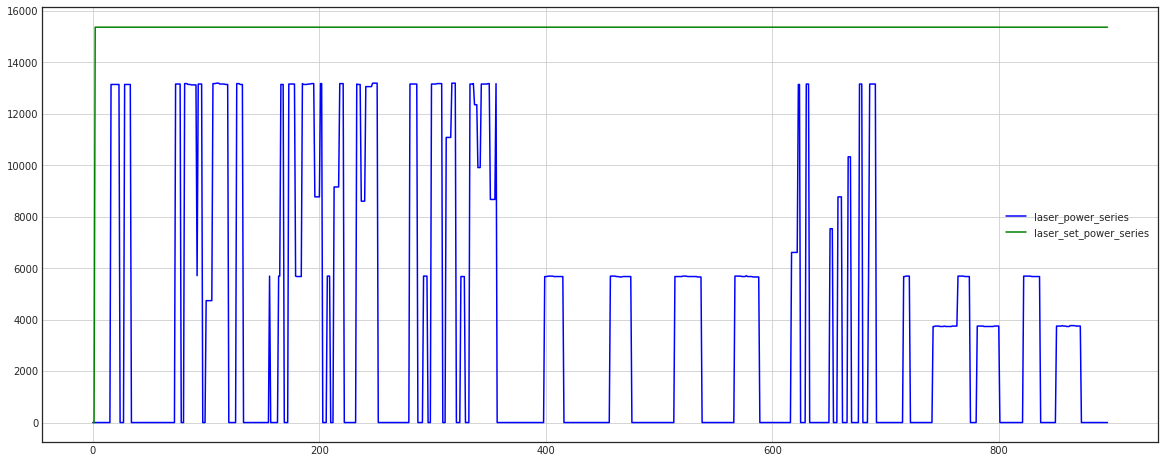

In [172]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    plt.plot(laser_power_series, "b", label = "laser_power_series")
    plt.plot(laser_set_power_series, "g", label = "laser_set_power_series")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.grid(True)

In [173]:
def normalization(lst):
    return [(element - min(lst))/(max(lst)-min(lst)) for element in lst]

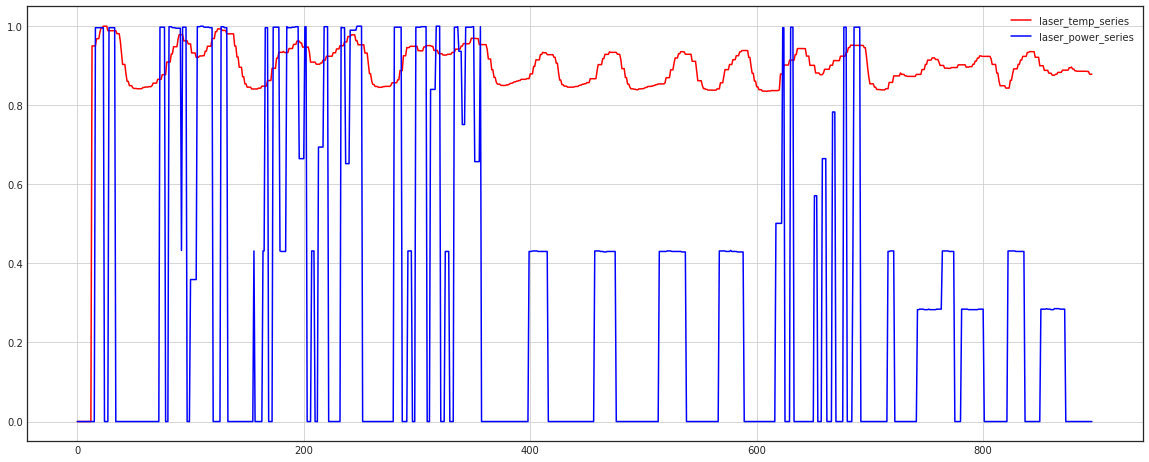

In [177]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    plt.plot(normalization(laser_temp_series), "r", label = "laser_temp_series")
    plt.plot(normalization(laser_power_series), "b", label = "laser_power_series")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.grid(True)

### Полная выборка

## Оптимальное историческое окно обучения
Lomb–Scargle method

In [175]:
import numpy as np
import scipy.signal as signal

f = np.linspace(0.01, 10, nout)
pgram_laser_temp = signal.lombscargle(times_unix, laser_temp_series, f, normalize=True)
pgram_laser_power = signal.lombscargle(times_unix, laser_power_series, f, normalize=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


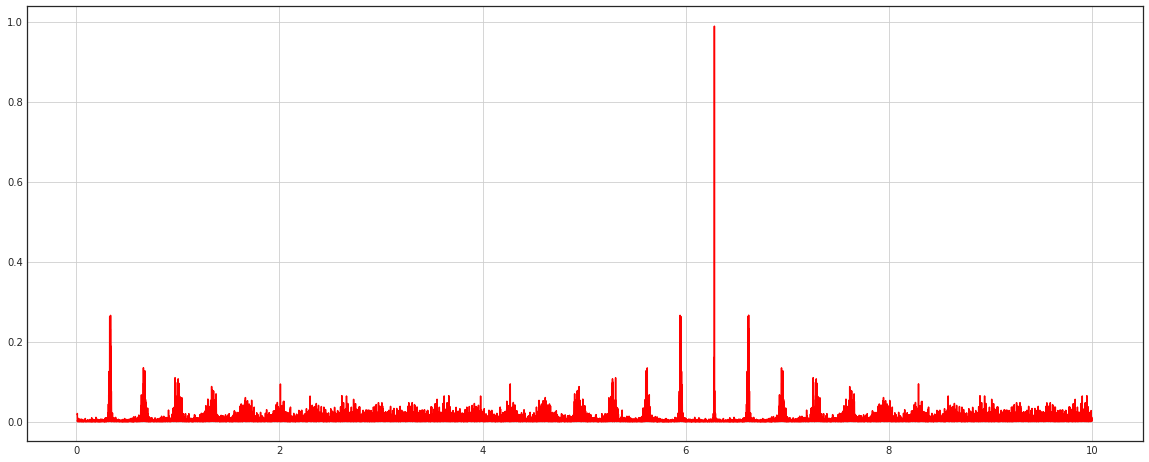

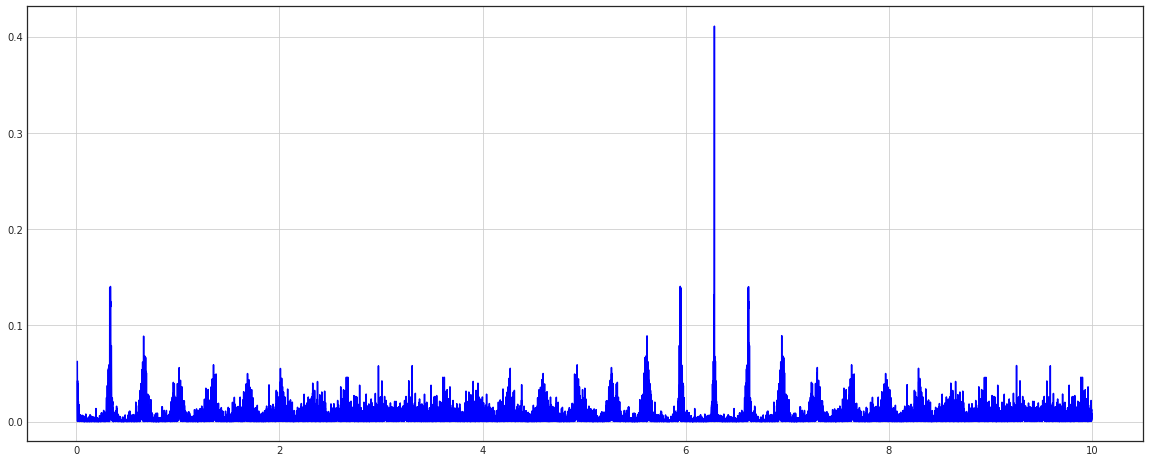

In [176]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    plt.plot(f, pgram_laser_temp, "r")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.grid(True)

with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    plt.plot(f, pgram_laser_power, "b")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.grid(True)

## Предсказание на основе LSTM

## Оптимальное окно предсказания

## Оптимальное количество кластеров

## Кластеризация на основе k-Shape с использованием оптимального окна и оптимального количества кластеров

In [122]:
from kshape.core import kshape

In [123]:
# Пример k-Shape
ts = [[1,2,3,4,5], [0,1,2,3,4], [3,2,1,0,-1], [1,2,2,3,3]]
cluster_num = 3
clusters = kshape(zscore(ts), cluster_num)
print(clusters)

[(array([-0.76243195, -1.3691508 ,  0.62669051,  0.65489541,  0.84999684]), [0, 1, 3]), (array([0., 0., 0., 0., 0.]), []), (array([ 1.40155523,  0.71986746, -0.6000603 , -0.76737598, -0.75398641]), [2])]


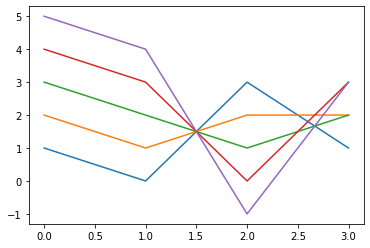

In [124]:
plt.plot(ts)

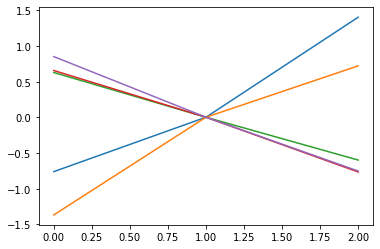

In [125]:
cnts = []
for centroid in clusters:
    cnts.append(centroid[0])
plt.plot(cnts)

## Градиентный бустинг